<a href="https://colab.research.google.com/github/tanoManzo/mimic_trajectories/blob/dev/MIMIC_TRAJECTORY_embeddings_03_graph_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import data**


In [78]:
import numpy as np
import pandas as pd

In [79]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/NIH/Data/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
notes_name = "NOTES_NURSING_TRAJECTORIES_sixtyCGs.csv"
df_notes = pd.read_csv(file_path+notes_name)
df_notes.info()
df_notes.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7802 entries, 0 to 7801
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CGID          7802 non-null   int64 
 1   SUBJECT_ID    7802 non-null   int64 
 2   emb_distance  7802 non-null   object
 3   attitudes     7802 non-null   object
dtypes: int64(2), object(2)
memory usage: 243.9+ KB


,CGID,SUBJECT_ID,emb_distance,attitudes
0,18539,1113,"[0.7640713453292847, 0.681618332862854, 0.7713220715522766, 0.7582300901412964, 0.7994049787521362, 0.8322175741195679, 0.7754385471343994, 0.6858768463134766, 0.8439784049987793, 0.8293728828430176, 0.8376027941703796, 0.8466968536376953, 0.6389403343200684, 0.6520780920982361, 0.8012651801109314, 0.722869873046875, 0.790868878364563, 0.8636050820350647, 0.7903918027877808, 0.6199541091918945]","['Overall Neutral Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Negative Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Negative Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Negative Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Neutral Note']"
1,18539,11952,"[0.8060404658317566, 0.8597074747085571]","['Overall Neutral Note', 'Overall Neutral Note', 'Overall Neutral Note']"
2,18539,25581,[],['Overall Neutral Note']
3,18539,135,[],['Overall Negative Note']
4,20020,25581,"[0.4966087341308594, 0.3582078516483307]","['Overall Negative Note', 'Overall Neutral Note', 'Overall Neutral Note']"


In [81]:
patient_features = "ADMISSIONS.csv"
df_patient_features = pd.read_csv(file_path+patient_features)
df_patient_features.info()
df_patient_features.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT/SDA,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


Show attitudes

In [82]:
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)
#print(df_notes['attitudes'])

# **Find pattern in data**

convert sentiment to list of ints per dict

In [83]:
import ast

labels_dict = {'Overall Neutral Note': 0, 'Overall Negative Note': -1, 'Overall Positive Note': 1}
def attitude_from_dict(row):
  row_list = ast.literal_eval(row)
  return [labels_dict[val] for val in row_list]

df_notes['attitudes_char'] = df_notes['attitudes'].apply(attitude_from_dict)
#df_notes['attitudes_char']

repair data (from string to list)

In [84]:
def convert_to_list(row):
  row_list = ast.literal_eval(row)
  return row_list

df_notes['attitudes'] = df_notes['attitudes'].apply(convert_to_list)
df_notes['emb_distance'] = df_notes['emb_distance'].apply(convert_to_list)
df_notes

,CGID,SUBJECT_ID,emb_distance,attitudes,attitudes_char
0,18539,1113,"[0.7640713453292847, 0.681618332862854, 0.7713220715522766, 0.7582300901412964, 0.7994049787521362, 0.8322175741195679, 0.7754385471343994, 0.6858768463134766, 0.8439784049987793, 0.8293728828430176, 0.8376027941703796, 0.8466968536376953, 0.6389403343200684, 0.6520780920982361, 0.8012651801109314, 0.722869873046875, 0.790868878364563, 0.8636050820350647, 0.7903918027877808, 0.6199541091918945]","[Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Negative Note, Overall Neutral Note, Overall Neutral Note, Overall Negative Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Negative Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note]","[0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]"
1,18539,11952,"[0.8060404658317566, 0.8597074747085571]","[Overall Neutral Note, Overall Neutral Note, Overall Neutral Note]","[0, 0, 0]"
2,18539,25581,[],[Overall Neutral Note],[0]
3,18539,135,[],[Overall Negative Note],[-1]
4,20020,25581,"[0.4966087341308594, 0.3582078516483307]","[Overall Negative Note, Overall Neutral Note, Overall Neutral Note]","[-1, 0, 0]"
...,...,...,...,...,...
7797,18232,11110,[],[Overall Neutral Note],[0]
7798,18232,20666,"[0.9633747935295105, 0.9566409587860107, 0.9846779704093933, 0.9772942066192627]","[Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note]","[0, 0, 0, 0, 0]"
7799,18232,6742,[],[Overall Neutral Note],[0]
7800,18232,5842,[],[Overall Neutral Note],[0]


find where sentiment changes

In [85]:
def compare_adjacent_values(row):
  result = []
  for i in range(len(row) - 1):
    if row[i] == row[i+1]:
      #print(i, row[i], row[i+1])
      result.append(0)
    else:
      #print(row[i], row[i+1])
      result.append(1)
  return result

df_notes['Sentiment_Change'] = df_notes['attitudes_char'].apply(compare_adjacent_values)

pd.set_option('display.max_colwidth', None)
#print(df_notes['Sentiment_Change'])

filter for sentiment changes

In [86]:
def find_sentiment_changes(row):
  return any(val != 0 for val in row)

mask = df_notes['Sentiment_Change'].apply(find_sentiment_changes)
sentiment_change = df_notes[mask]
sentiment_neutral = df_notes[~mask]
sentiment_change.info()
sentiment_change

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 7789
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CGID              199 non-null    int64 
 1   SUBJECT_ID        199 non-null    int64 
 2   emb_distance      199 non-null    object
 3   attitudes         199 non-null    object
 4   attitudes_char    199 non-null    object
 5   Sentiment_Change  199 non-null    object
dtypes: int64(2), object(4)
memory usage: 10.9+ KB


,CGID,SUBJECT_ID,emb_distance,attitudes,attitudes_char,Sentiment_Change
0,18539,1113,"[0.7640713453292847, 0.681618332862854, 0.7713220715522766, 0.7582300901412964, 0.7994049787521362, 0.8322175741195679, 0.7754385471343994, 0.6858768463134766, 0.8439784049987793, 0.8293728828430176, 0.8376027941703796, 0.8466968536376953, 0.6389403343200684, 0.6520780920982361, 0.8012651801109314, 0.722869873046875, 0.790868878364563, 0.8636050820350647, 0.7903918027877808, 0.6199541091918945]","[Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Negative Note, Overall Neutral Note, Overall Neutral Note, Overall Negative Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Negative Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note]","[0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]"
4,20020,25581,"[0.4966087341308594, 0.3582078516483307]","[Overall Negative Note, Overall Neutral Note, Overall Neutral Note]","[-1, 0, 0]","[1, 0]"
59,18426,17222,"[0.6631338000297546, 0.4329010844230652, 0.5630002617835999, 0.7208487391471863, 0.7648167610168457, 0.6853678226470947, 0.4840030074119568, 0.5775957107543945, 0.5268188118934631, 0.43329787254333496]","[Overall Neutral Note, Overall Neutral Note, Overall Negative Note, Overall Negative Note, Overall Neutral Note, Overall Negative Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Negative Note]","[0, 0, -1, -1, 0, -1, 0, 0, 0, 0, -1]","[0, 1, 0, 1, 1, 1, 0, 0, 0, 1]"
71,15065,16612,"[0.7925119400024414, 0.8526357412338257, 0.7178159952163696]","[Overall Neutral Note, Overall Neutral Note, Overall Negative Note, Overall Neutral Note]","[0, 0, -1, 0]","[0, 1, 1]"
152,19068,16772,"[0.27509909868240356, 0.5277177095413208]","[Overall Neutral Note, Overall Neutral Note, Overall Positive Note]","[0, 0, 1]","[0, 1]"
...,...,...,...,...,...,...
7774,18232,14541,"[0.97615647315979, 0.9121605157852173, 0.956670343875885, 0.9581432938575745, 0.9685827493667603, 0.9934008121490479, 0.930213451385498, 0.9649964570999146, 0.8722547888755798, 0.986845076084137, 0.9829055666923523, 0.9307608008384705, 0.9592189788818359, 0.904012143611908, 0.9615298509597778, 0.9812551140785217, 0.9870139956474304]","[Overall Positive Note, Overall Positive Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Positive Note, Overall Neutral Note, Overall Positive Note, Overall Positive Note, Overall Positive Note, Overall Positive Note, Overall Neutral Note, Overall Positive Note, Overall Positive Note, Overall Positive Note]","[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1]","[0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0]"
7776,18232,4027,"[0.9601464867591858, 0.960555374622345]","[Overall Positive Note, Overall Neutral Note, Overall Neutral Note]","[1, 0, 0]","[1, 0]"
7782,18232,20995,"[0.9028393030166626, 0.9640562534332275, 0.9300967454910278, 0.9537899494171143, 0.9584803581237793, 0.9150962829589844, 0.9513445496559143, 0.9612488150596619]","[Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note, Overall Positive Note, Overall Positive Note, Overall Neutral Note, Overall Neutral Note, Overall Neutral Note]","[0, 0, 0, 0, 1, 1, 0, 0, 0]","[0, 0, 0, 1, 0, 1, 0, 0]"
7788,18232,11532,"[0.9492400884628296, 0.9320465326309204, 0.9728944897651672, 0.9413376450538635, 0.9471530318260193]","[Overall Positive Note, Overall Neutral Note, Overall Positive Note, Overall Neutral Note, Overall Neutral Note, Overall Positive Note]","[1, 0, 1, 0, 0, 1]","[1, 1, 1, 0, 1]"


In [87]:
sentiment_change = sentiment_change.merge(df_patient_features, left_on='SUBJECT_ID', right_on='SUBJECT_ID')

In [88]:
sentiment_change.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CGID                  216 non-null    int64 
 1   SUBJECT_ID            216 non-null    int64 
 2   emb_distance          216 non-null    object
 3   attitudes             216 non-null    object
 4   attitudes_char        216 non-null    object
 5   Sentiment_Change      216 non-null    object
 6   ROW_ID                216 non-null    int64 
 7   HADM_ID               216 non-null    int64 
 8   ADMITTIME             216 non-null    object
 9   DISCHTIME             216 non-null    object
 10  DEATHTIME             3 non-null      object
 11  ADMISSION_TYPE        216 non-null    object
 12  ADMISSION_LOCATION    216 non-null    object
 13  DISCHARGE_LOCATION    216 non-null    object
 14  INSURANCE             216 non-null    object
 15  LANGUAGE              15 non-null     ob

# **Add labels to graph**

In [89]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [90]:
def plot_cgid(multi_row_data):
  for index, data in multi_row_data.iterrows():
    dist = data['emb_distance']
    sns.scatterplot(dist, label=f"SUBID:{data['SUBJECT_ID']}\nINSURANCE:{data['INSURANCE']} LANGUAGE:{data['LANGUAGE']} RELIGION:{data['RELIGION']} ETHNICITY:{data['ETHNICITY']}")
    model_labels = data['attitudes']
    labels_dict = {'Overall Neutral Note': '0', 'Overall Negative Note': 'N', 'Overall Positive Note': 'P'}
    graph_labels = [labels_dict[label] for label in model_labels]

    # Add sentiment next to points
    for index, row in enumerate(dist):
      x_position = index - 0.03*len(graph_labels)
      x2_position = index + 0.0075*len(graph_labels)
      y_position = dist[index] - 0.01
      if(graph_labels[index] != '0'):
        plt.text(x_position, y_position, graph_labels[index], fontsize=10, color='red')        
      elif (graph_labels[index+1] != '0'):
        plt.text(x2_position, y_position, graph_labels[index+1], fontsize=10, color='red')

  # Title and x/y axes
  plt.title(f"Sentence Comparison of CGID:{data['CGID']}")
  plt.xlabel("Sentence Comparison")
  plt.ylabel("Cosine Similarity")

  # Legend 2
  legend_handles = [Rectangle((0, 0), 0, 0, alpha=0, label=f"{short_label}: {original_label}") 
                    for original_label, short_label in labels_dict.items()]

  # legend under graph
  #legend2 = plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(2, 1), ncol=len(labels_dict), title='Sentence Sentiment')

  # Legend main
  legend = plt.legend(title="Data", loc='upper center', bbox_to_anchor=(0.5, -0.15))
  #plt.gca().add_artist(legend2)

  # X-axis tick marks
  ax = plt.gca()
  ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  new_ticks = [str(i) for i in range(len(model_labels))]
  ax.set_xticklabels(new_ticks)

  # Y-axis tick marks
  ax.set_ylim(0,1)

  plt.show()

14160


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


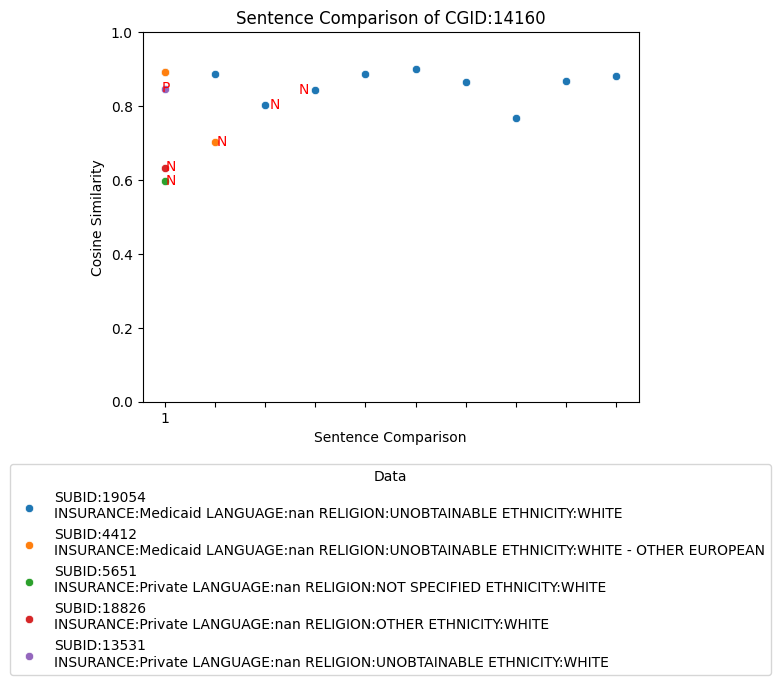

14215


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


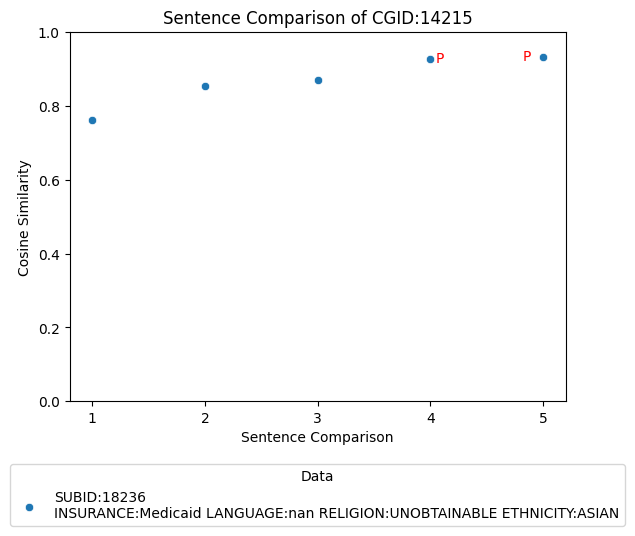

14277


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


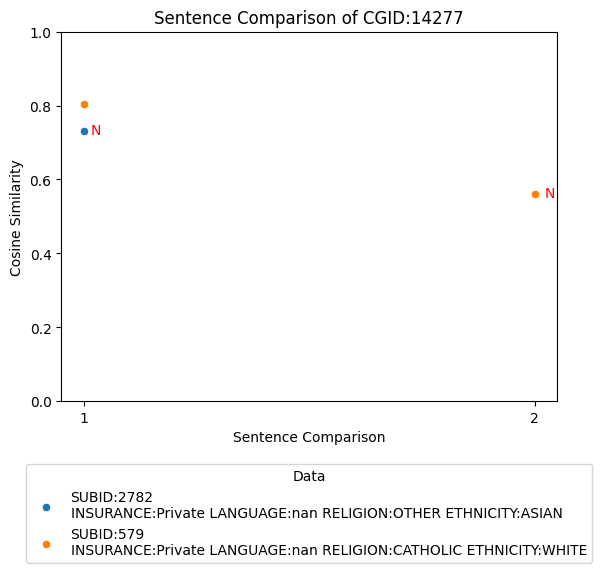

14421


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


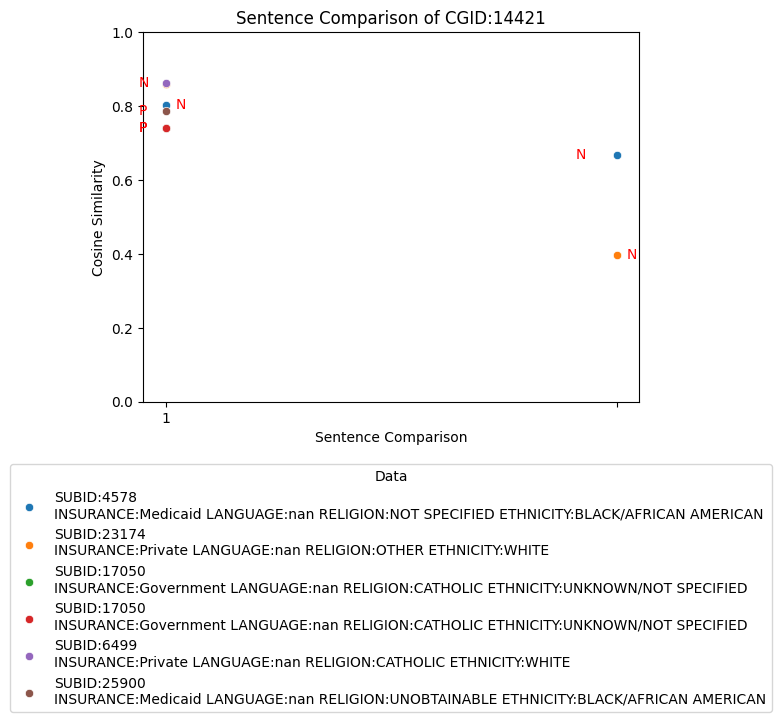

14712


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


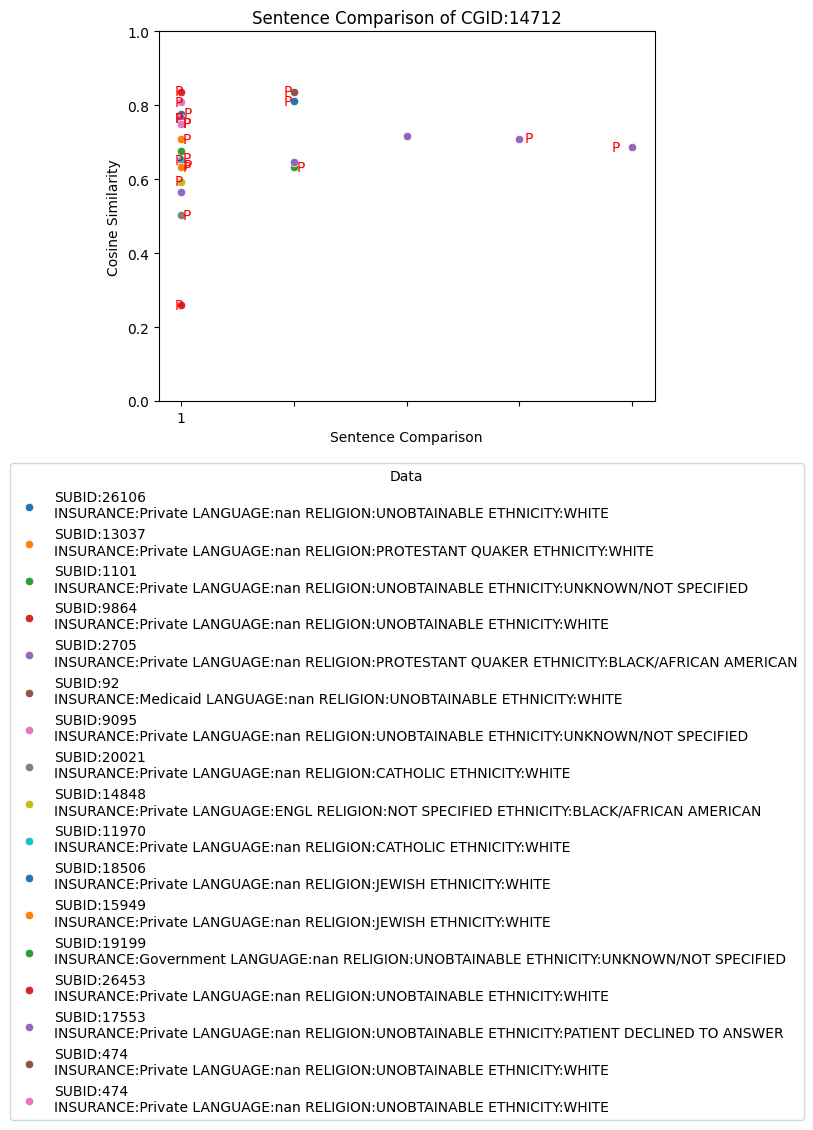

14720


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


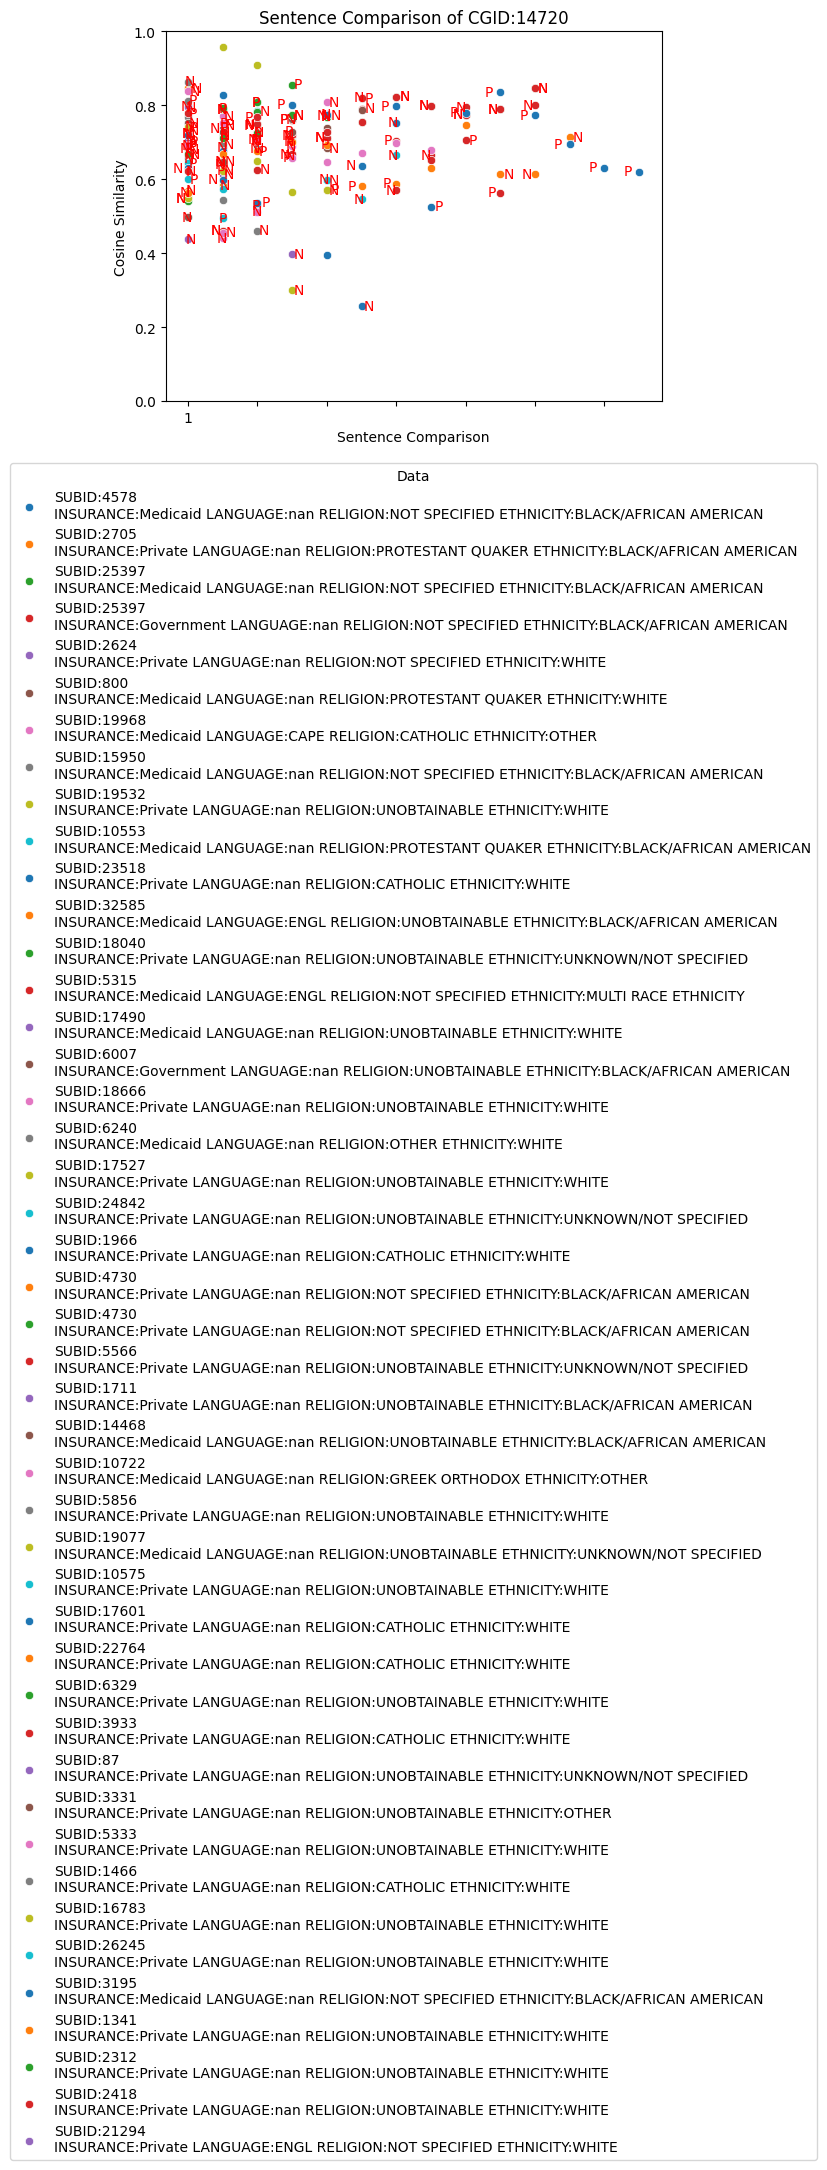

15065


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


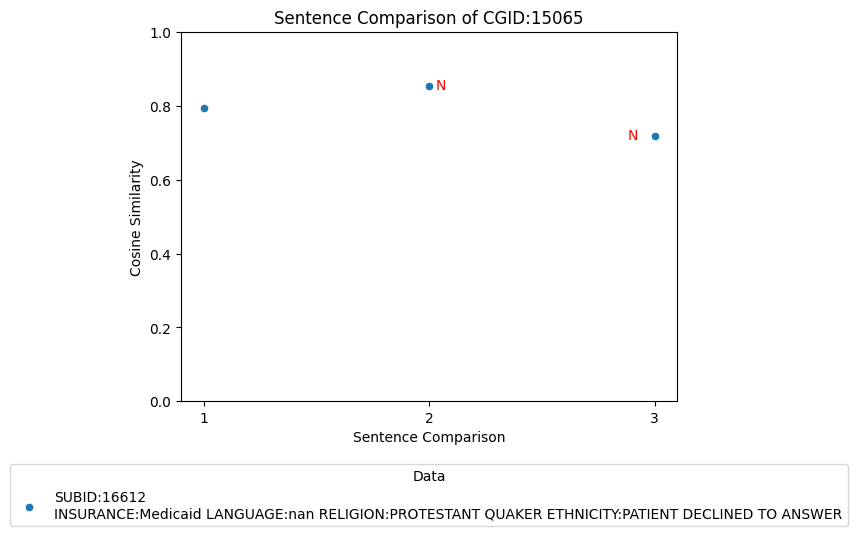

15241


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


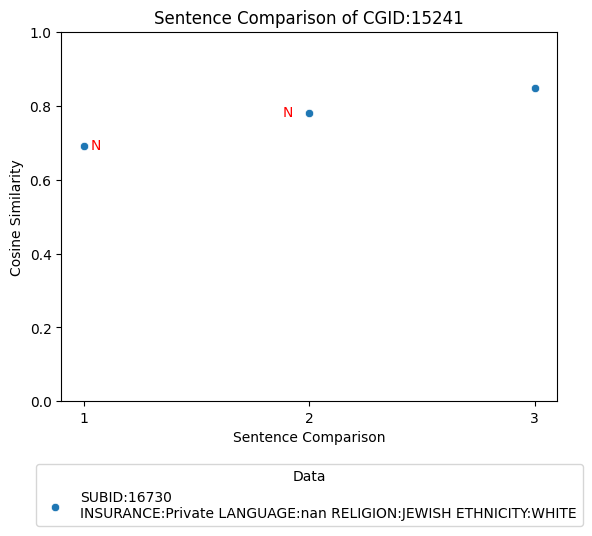

15393


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


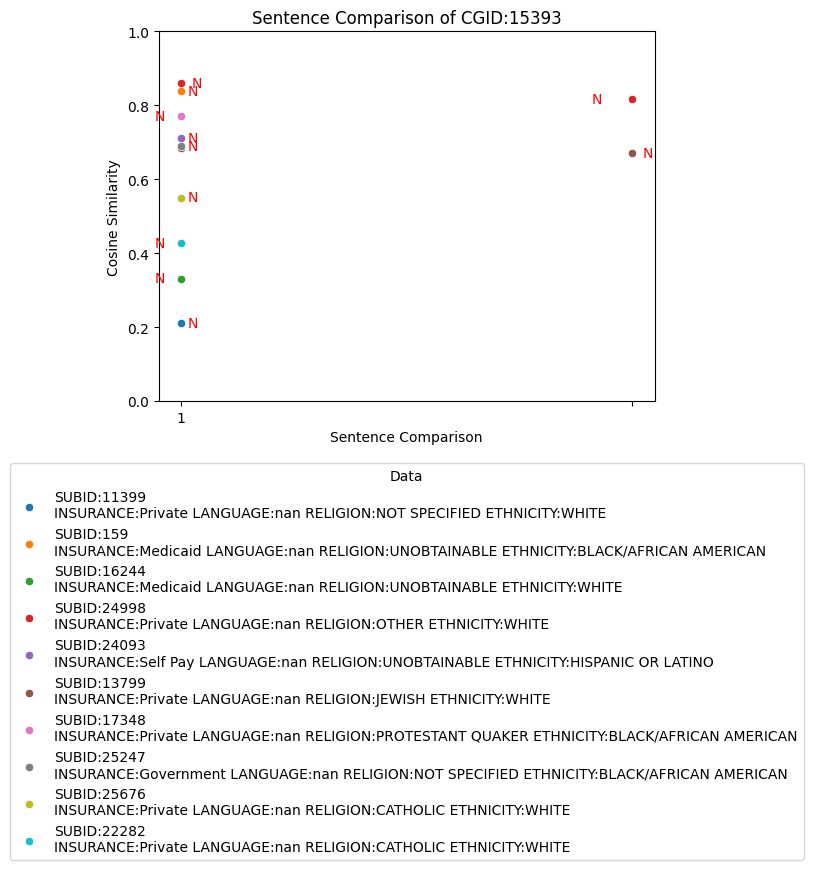

15448


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


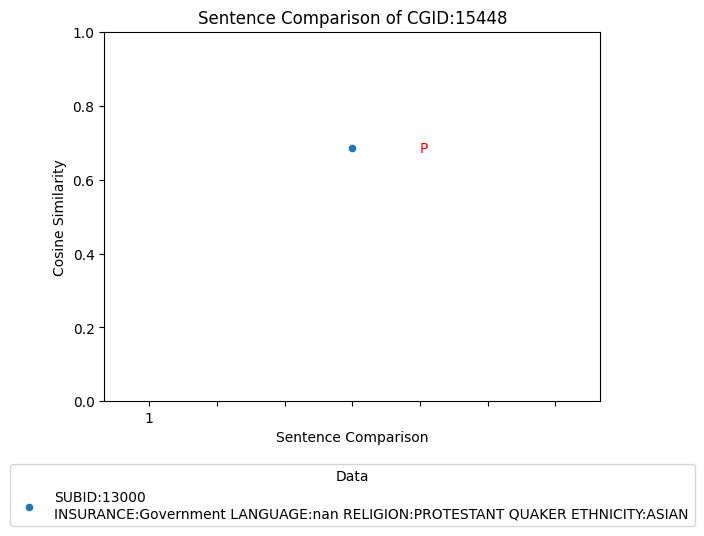

16010


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


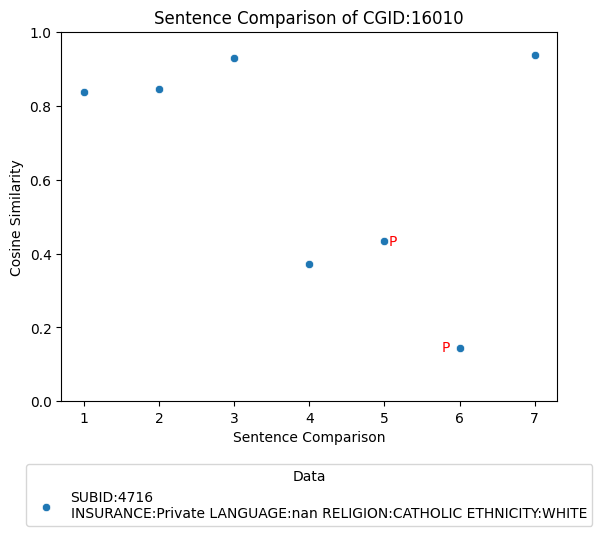

16162


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


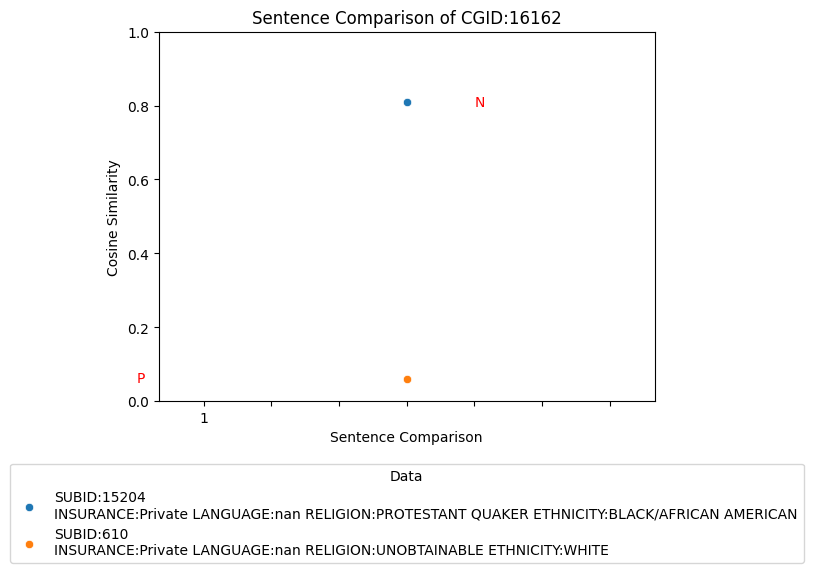

16367


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


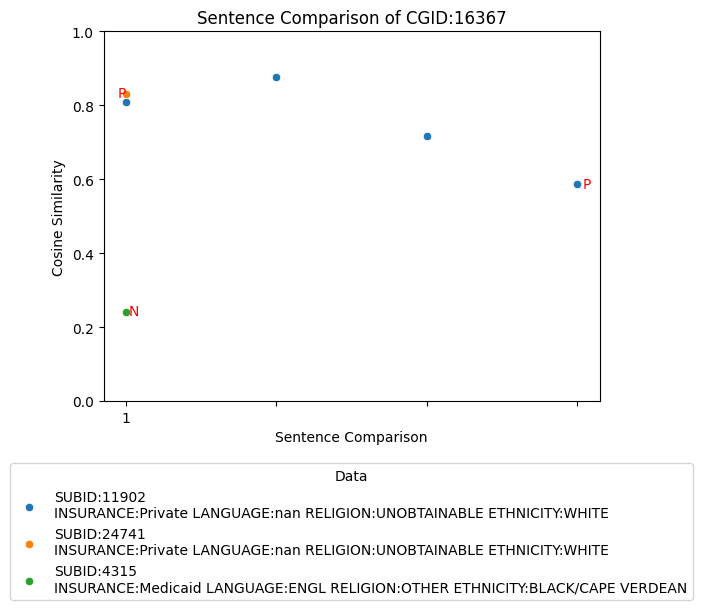

16638


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


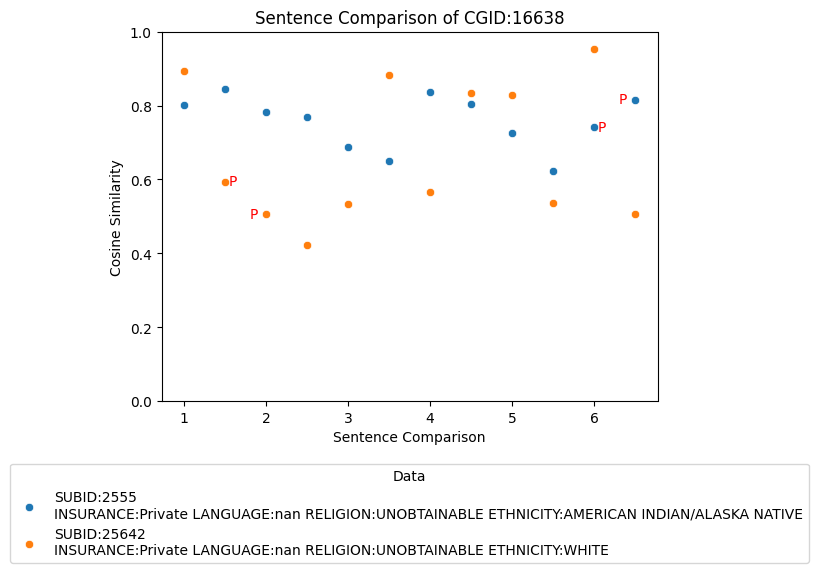

16937


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


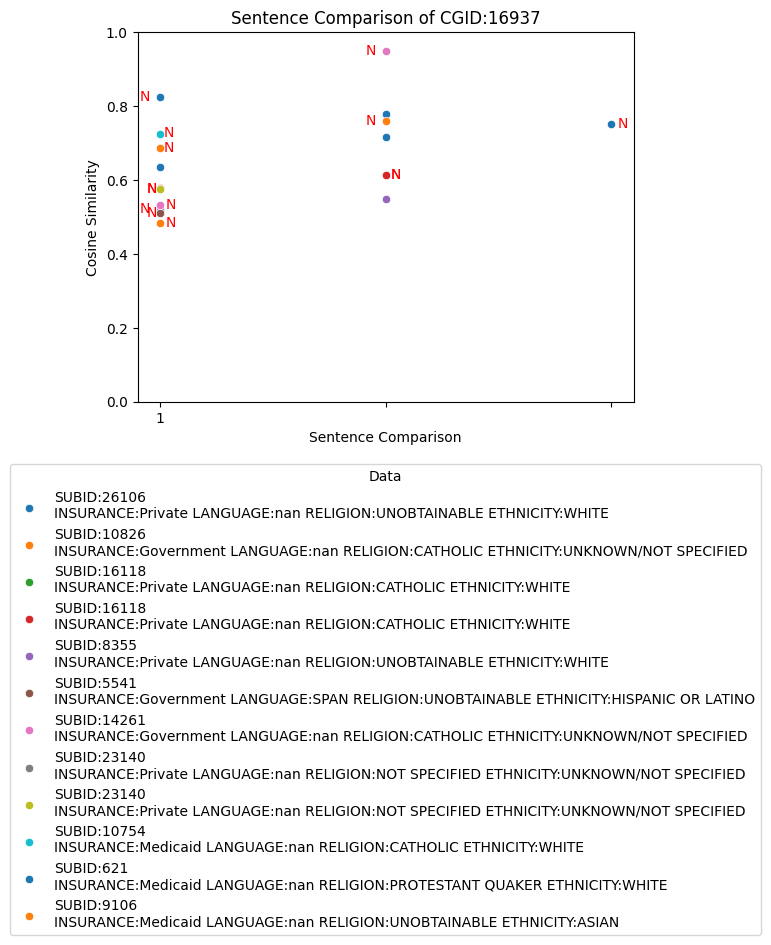

17072


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


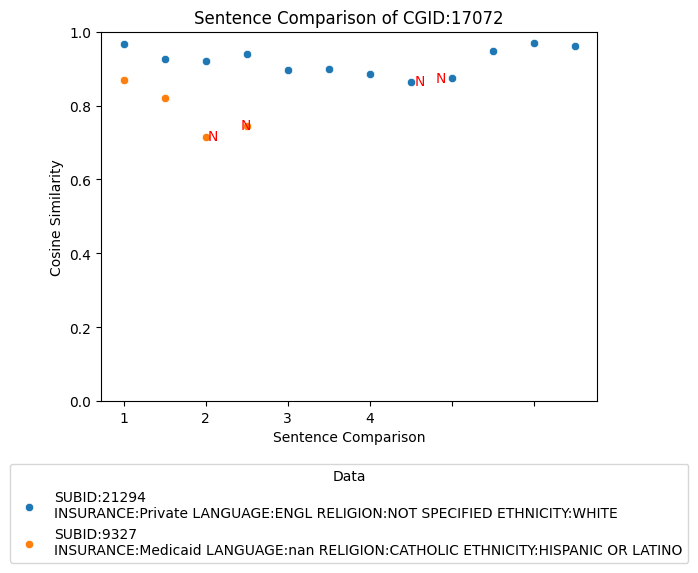

17671


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


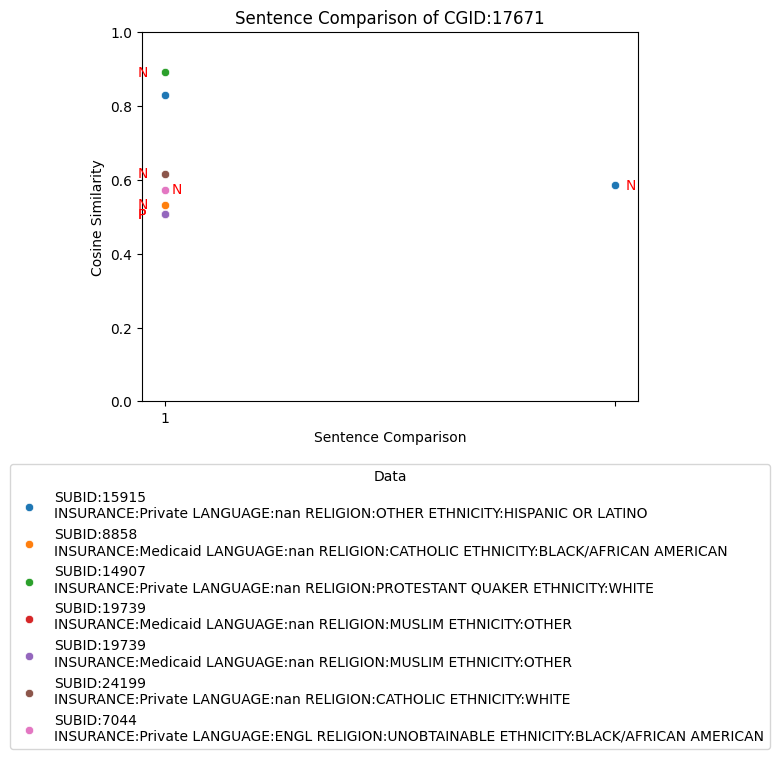

17774


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


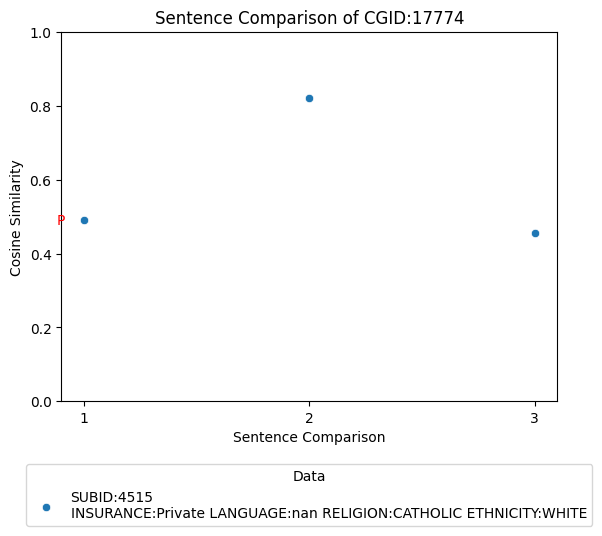

18232


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


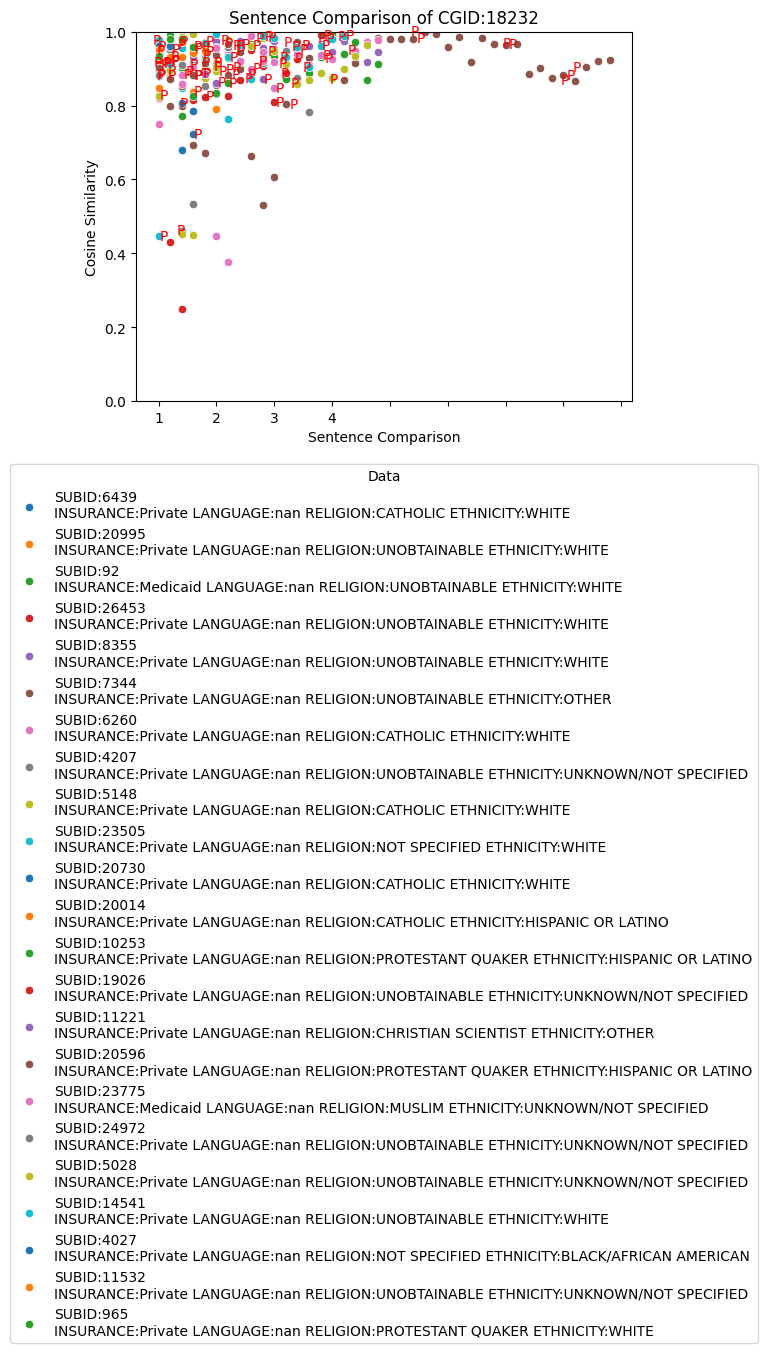

18270


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


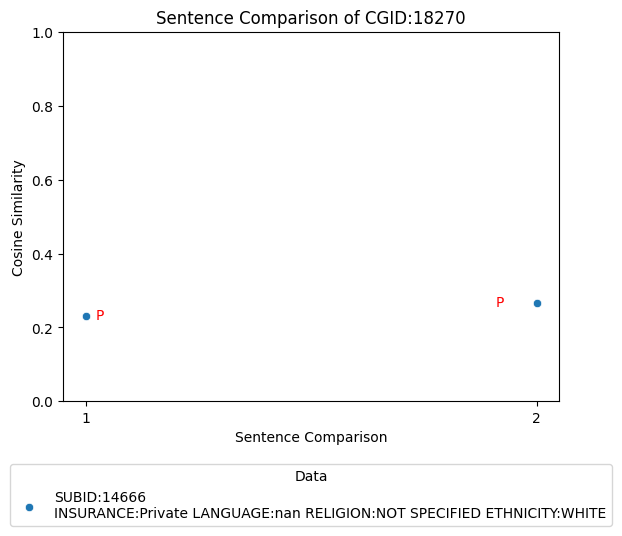

18426


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


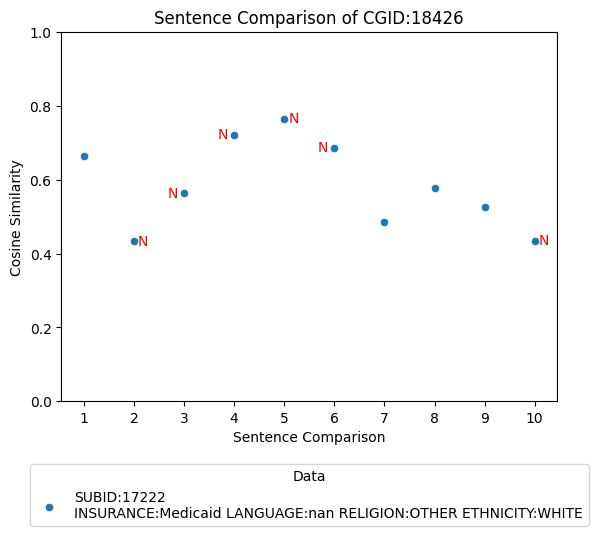

18539


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


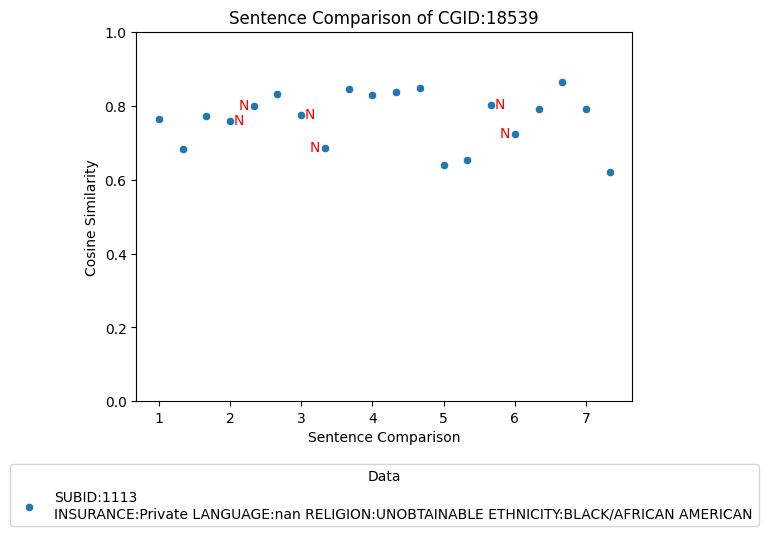

18709


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


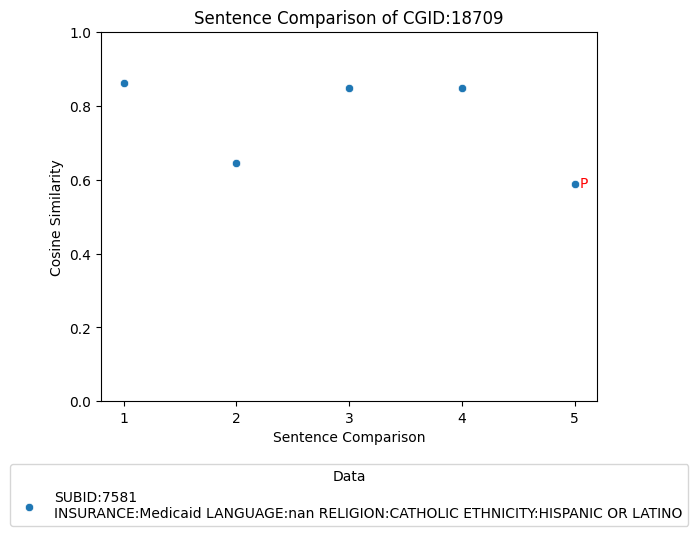

18937


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


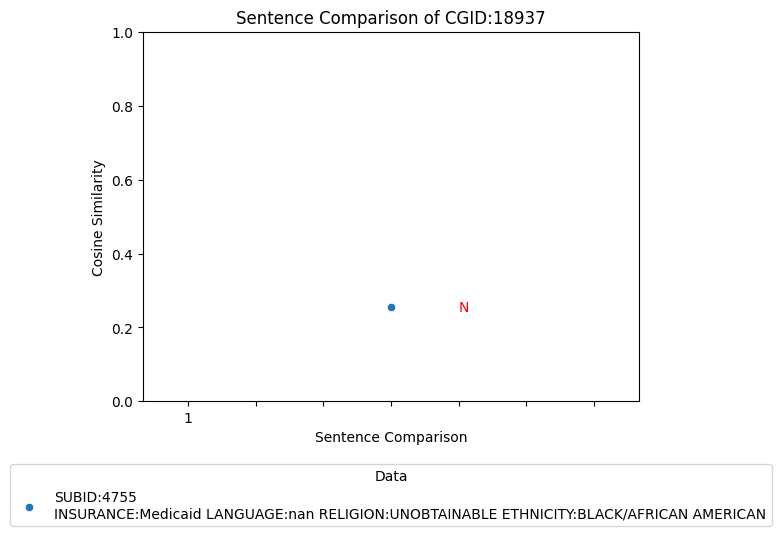

19068


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


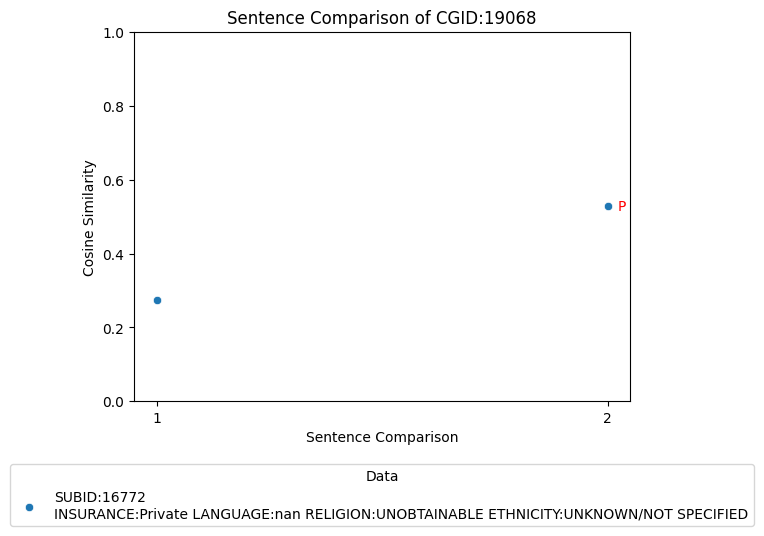

19137


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


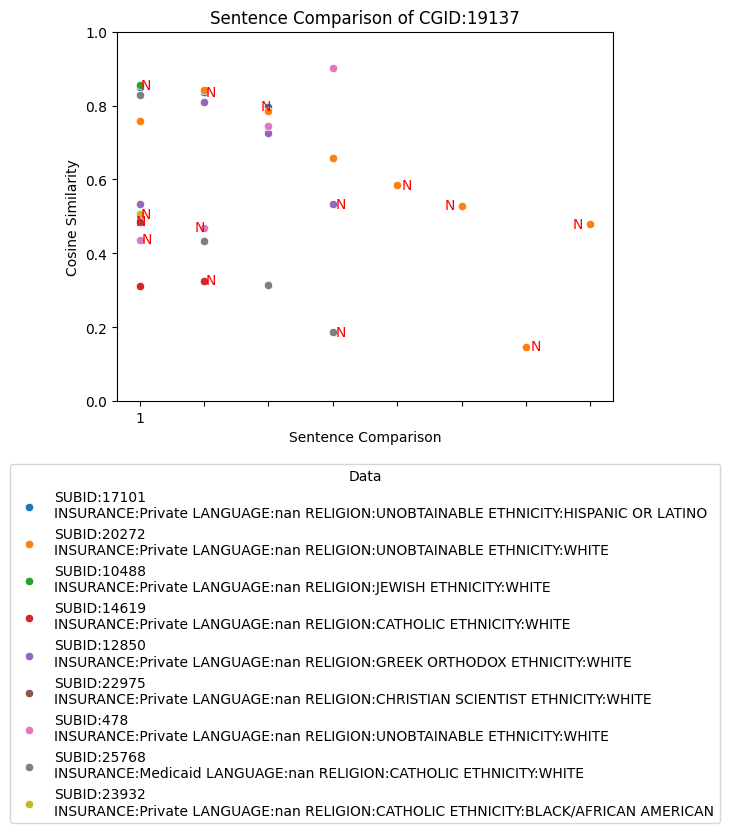

19530


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


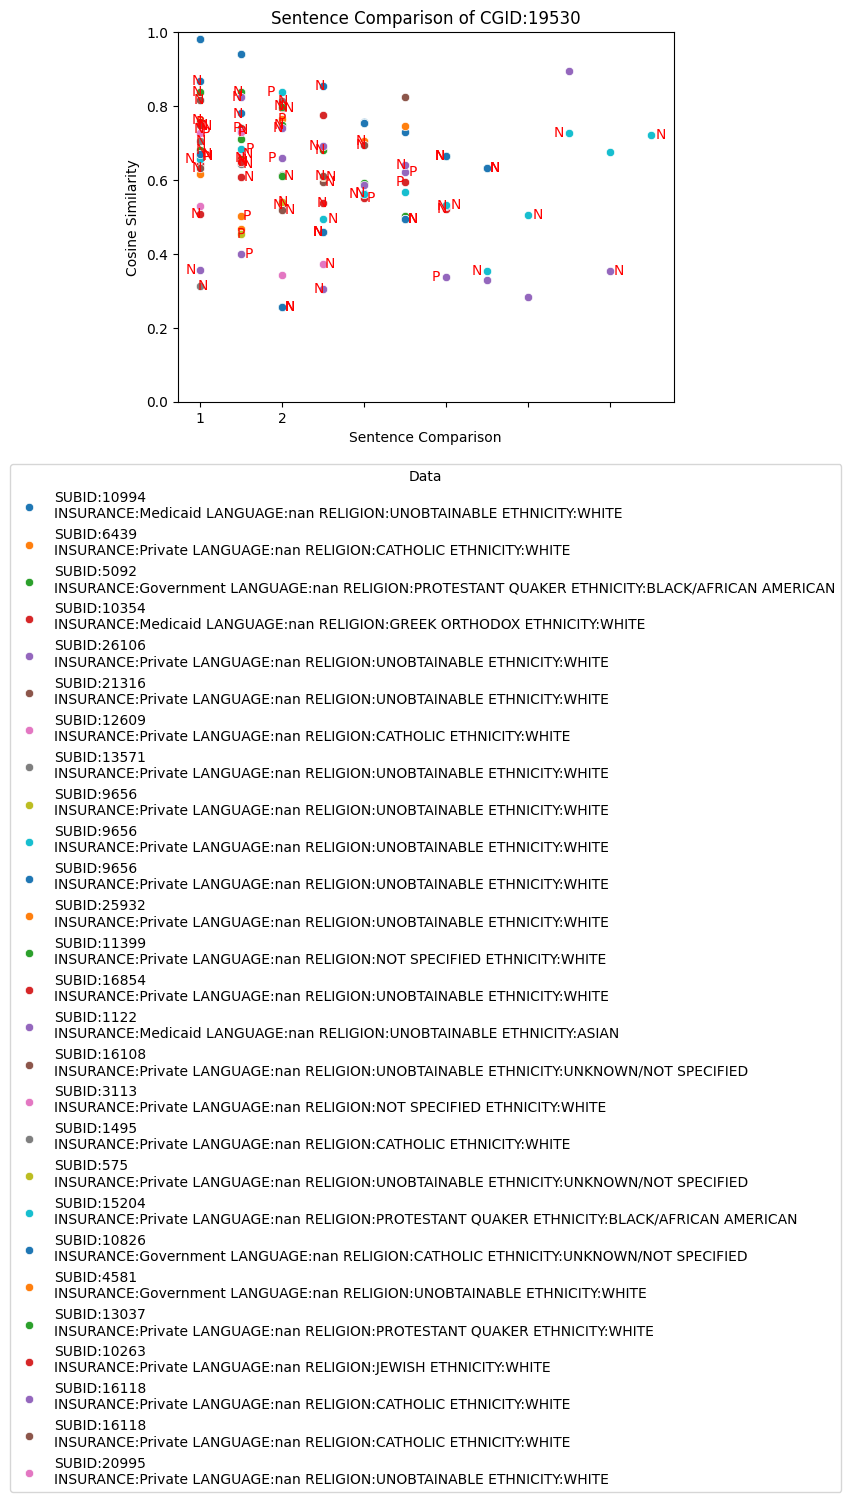

19538


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


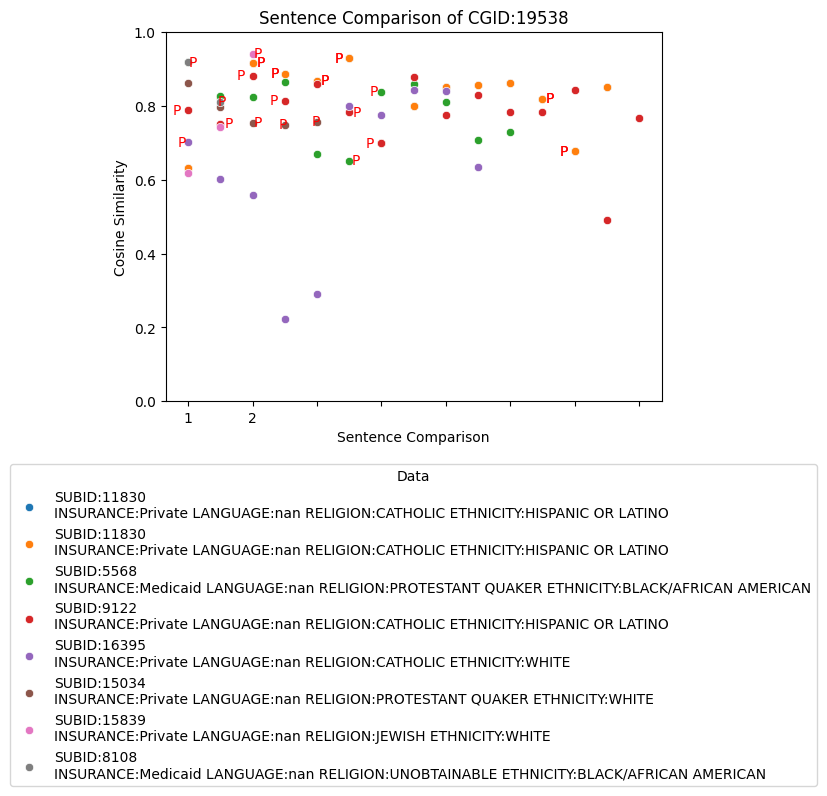

19639


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


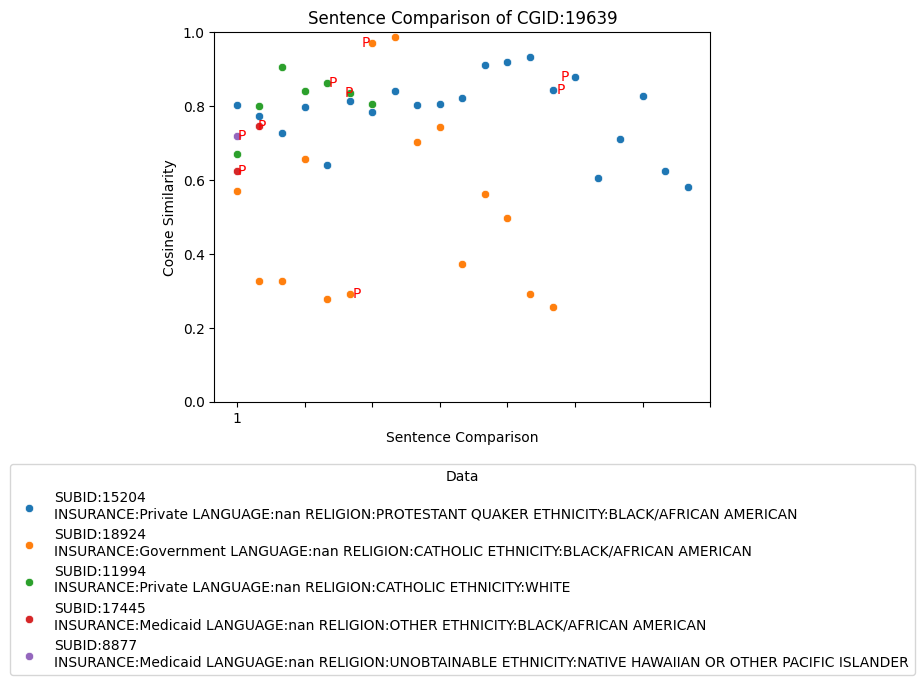

20020


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


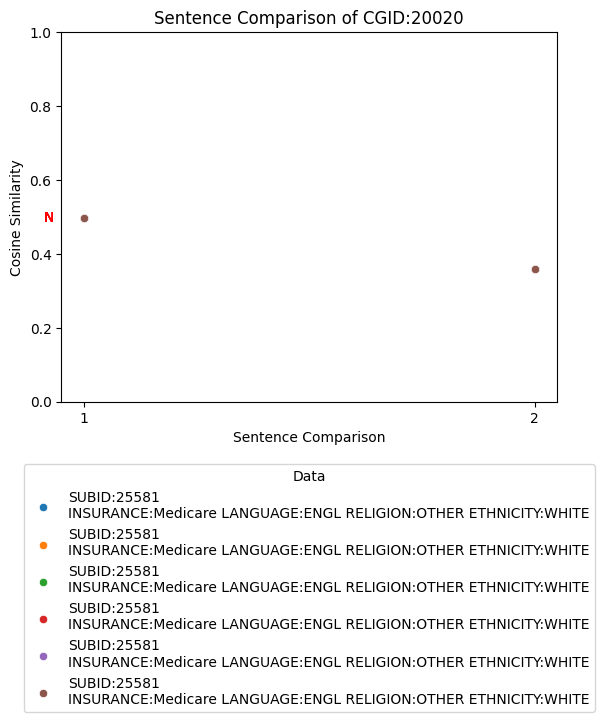

20213


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


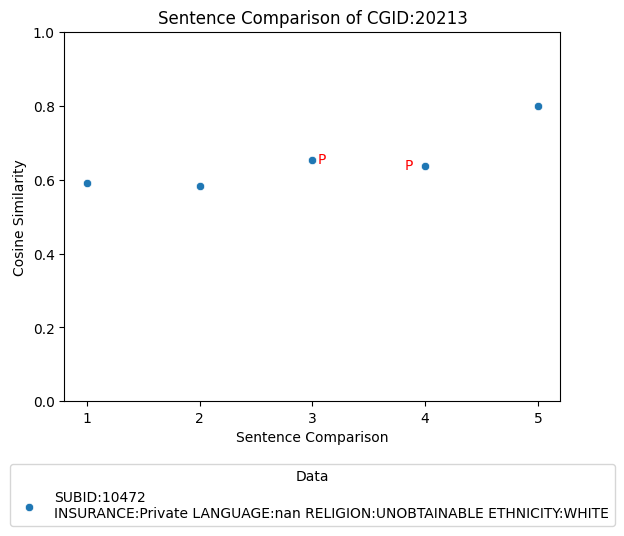

20433


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


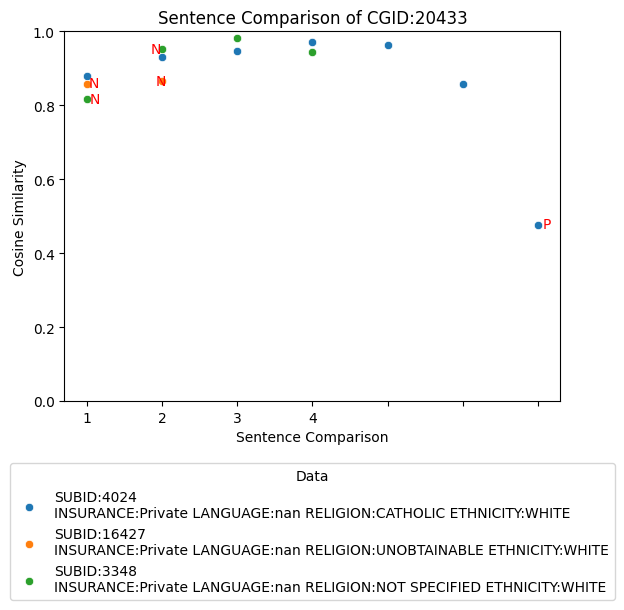

20700


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


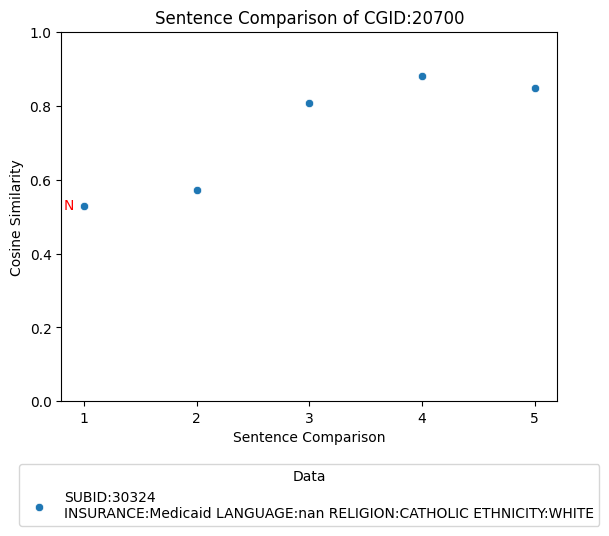

20756


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


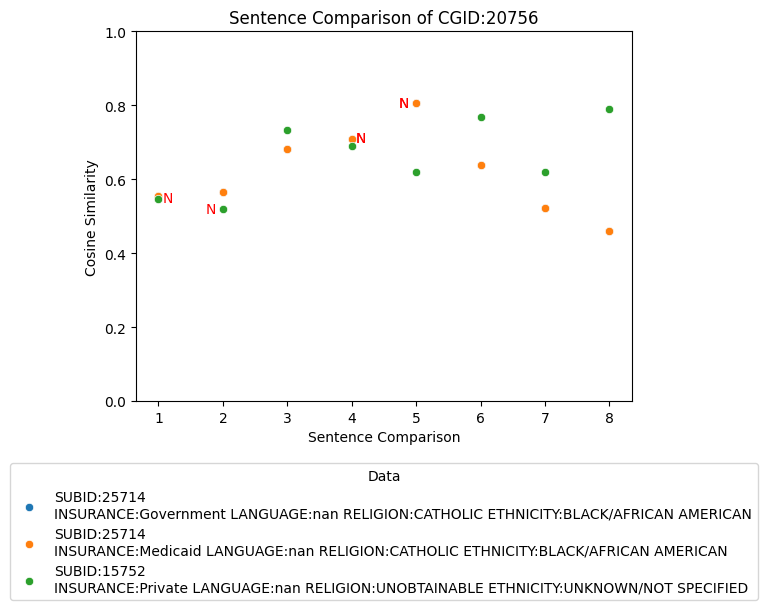

20821


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


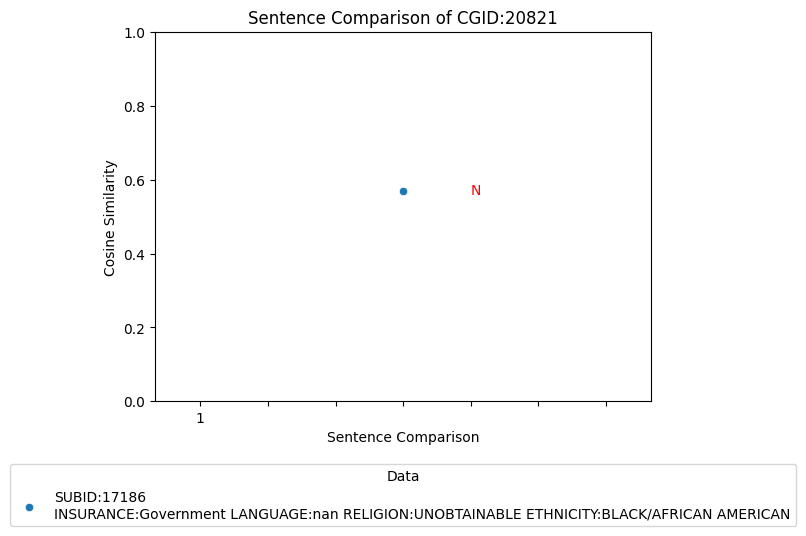

21420


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


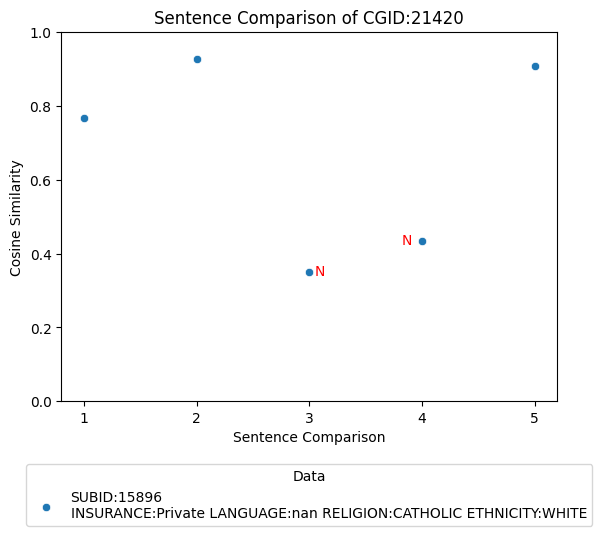

21563


<ipython-input-90-932bca94c0ae>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


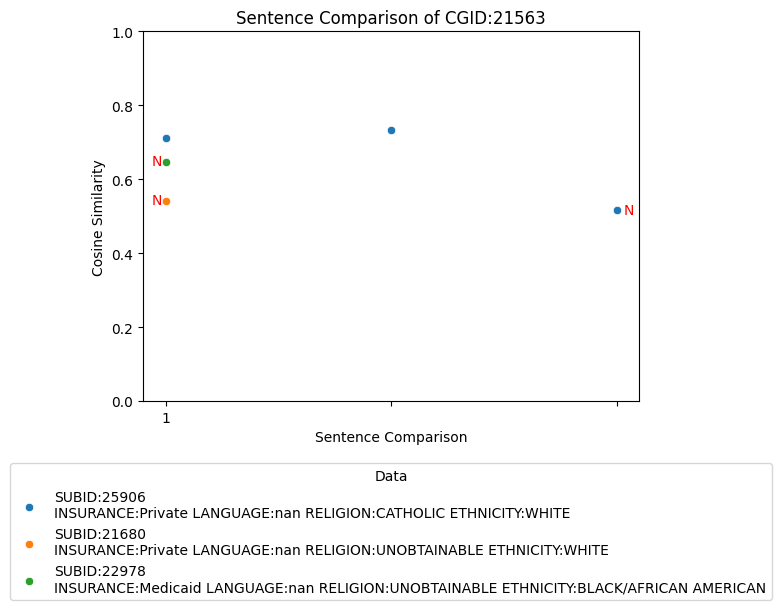

In [91]:
groupCG_sentiment_change = sentiment_change.groupby('CGID')

for CGID, group in groupCG_sentiment_change:
  print(CGID)
  plot_cgid(group)


In [92]:
def plot_cgid_1(dist, sentiment):
  sns.scatterplot(dist)
  model_labels = sentiment
  labels_dict = {'Overall Neutral Note': '0', 'Overall Negative Note': 'N', 'Overall Positive Note': 'P'}
  graph_labels = [labels_dict[label] for label in model_labels]

  # Add sentiment next to points
  for index, row in enumerate(dist):

    x_position = index - 0.15
    x2_position = index + 0.075
    y_position = dist[index] - 0.0075
    plt.text(x_position, y_position, graph_labels[index], fontsize=10, color='red')
    plt.text(x2_position, y_position, graph_labels[index+1], fontsize=10, color='red')

  # Title and x/y axes
  plt.title("Sentence Comparison of Cosine Similarity and Sentiment")
  plt.xlabel("Sentence Comparison")
  plt.ylabel("Cosine Similarity")

  # X-axis tick marks
  ax = plt.gca()
  ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  new_ticks = [str(i) for i in range(len(graph_labels))]
  ax.set_xticklabels(new_ticks)

  # Legend
  legend_handles = [Rectangle((0, 0), 0, 0, alpha=0, label=f"{short_label}: {original_label}") 
                    for original_label, short_label in labels_dict.items()]
  #legend_handles = [Text(0, 0, label=f"{short_label}: {original_label}") for original_label, short_label in labels_dict.items()]

  # legend to right of graph
  #plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Sentiment')

  # legend under graph
  plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(labels_dict), title='Sentence Sentiment')

  plt.show()

In [93]:
def plot_cgid_2(dist, sentiment):
  sns.scatterplot(dist)
  model_labels = l_labels['roberta']
  labels_dict = {'Overall Neutral Note': '0', 'Overall Negative Note': 'N', 'Overall Positive Note': 'P'}
  graph_labels = [labels_dict[label] for label in model_labels]

  # Add sentiment next to points
  plt.text(-0.15, dist[0]-.0075, graph_labels[0], fontsize=10, color='red')
  for index, row in enumerate(dist):
    if index == 0:
      continue
    x_position = index - 0.5
    x2_position = index + 0.075
    y_position = (dist[index] + dist[index-1] - 0.0075)/2
    plt.text(x_position, y_position, graph_labels[index], fontsize=10, color='red')
  plt.text(len(dist)-1+0.075, dist[len(dist)-1]-0.0075, graph_labels[len(dist)], fontsize=10, color='red')

  # Title and x/y axes
  plt.title("Sentence Comparison of Cosine Similarity and Sentiment")
  plt.xlabel("Sentence Comparison")
  plt.ylabel("Cosine Similarity")

  # X-axis tick marks
  ax = plt.gca()
  ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  new_ticks = [str(i) for i in range(len(graph_labels))]
  ax.set_xticklabels(new_ticks)

  # Legend
  legend_handles = [Rectangle((0, 0), 0, 0, alpha=0, label=f"{short_label}: {original_label}") 
                    for original_label, short_label in labels_dict.items()]
  #legend_handles = [Text(0, 0, label=f"{short_label}: {original_label}") for original_label, short_label in labels_dict.items()]

  # legend to right of graph
  #plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Sentiment')

  # legend under graph
  plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(labels_dict), title='Sentence Sentiment')

  plt.show()